### Observe FPS change with low-light scene

this is for logitech at 1080p, in weak daylight, controlling both living room lights. FPS changes from 30 (at high light) to 15 (at low light)

In [62]:
import os, sys
import subprocess
import cv2
from matplotlib import pyplot as plt

sys.path.append("../")
from modules.Utils import TimeLog
from miscutils import parseCommas

%matplotlib inline

In [58]:
def callTimelog(pathFn):
    
    p  = subprocess.check_output(["python", "timelog.py"
                                  ,"--file", pathFn]
                            ,cwd="../", shell=True)
    print p

In [61]:
def showGraph(data):
  plt.plot(data)
  plt.show()

def timelogGraph(pathFn, s_xrange=""):
    ' copied from timelog.py'
    
    timelog = TimeLog()

    data = timelog.load_log_data(path_fn=pathFn)

    if s_xrange != "":
        x_range = parseCommas(s_xrange)
        if x_range is not None:
          if len(x_range) == 2:
            data = data[x_range[0]:x_range[1]]

    showGraph(data)

-----------
metric:  time-per-frame
file:    output3.txt
skip:    1
-----------
n:       316
mean:    0.0395
Z +/-  : 0.0380 - 0.0410
min:     0.0309   0.7 sd
max:     0.0810   3.2 sd
sd:      0.0132



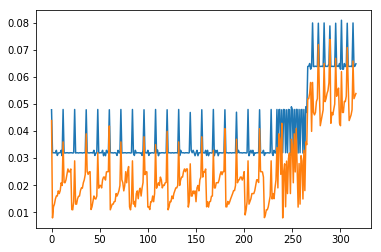

In [85]:
callTimelog("data/proc/raw/nov15/nov_calib_1/output3.txt")
timelogGraph("../data/proc/raw/nov15/nov_calib_1/output3.txt")

In [82]:
data = "../data/usr/nov_calib_1/output3.avi"
cam = cv2.VideoCapture(data)
counter = 0
list_frames = []

while(True):
    ret, frame = cam.read()
    
    if ret:
        counter += 1
        if counter in (1, 100, 225, 250, 290, 310):
            list_frames.append(frame)
        continue
    else:
        break

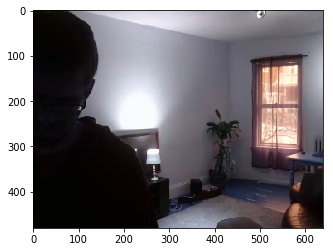

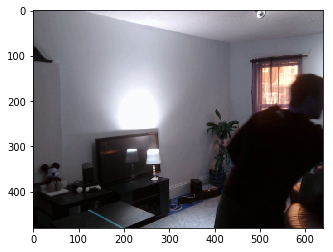

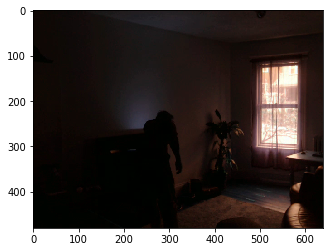

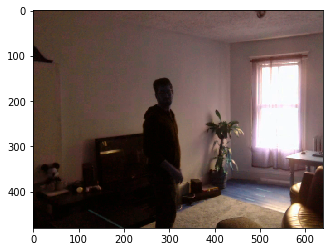

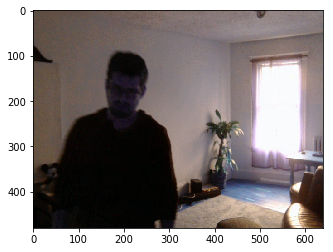

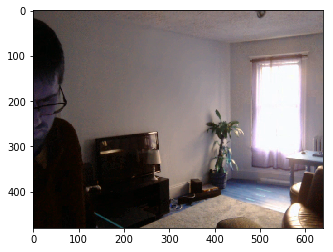

In [83]:
for f in list_frames:
    plt.imshow(f)
    plt.show()